# Data Mining Assignment - Collecting tweets related to stock market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

### Accessing Saved Datasets For Further Processing

In [2]:
df1 = pd.read_csv('altcoin.csv')
df1 = df1.assign(keyword='altcoin')

df2 = pd.read_csv('APPL.csv')
df2 = df1.assign(keyword='appl')

df3 = pd.read_csv('bitcoin.csv')
df3 = df1.assign(keyword='bitcoin')

df4 = pd.read_csv('coindesk.csv')
df4 = df1.assign(keyword='coindesk')

df5 = pd.read_csv('cryptocurrency.csv')
df5 = df1.assign(keyword='cryptocurrency')

df6 = pd.read_csv('gold.csv')
df6 = df1.assign(keyword='gold')

df7 = pd.read_csv('GOOG.csv')
df7 = df1.assign(keyword='goog')

df8 = pd.read_csv('YHOO.csv')
df8 = df1.assign(keyword='yhoo')

#### Accessing & Merging All Dataset CSV Files Into A Singular Dataframe

In [3]:
final_df = pd.concat(
    [df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=False)

final_df.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,ReTweet Count,Reply Count,View Count,keyword
0,0,DropTownSaloon,2023-03-01 23:58:40+00:00,6,droptown,Ethereum Activates Key Advancement in New 'Acc...,1,1,29.0,altcoin
1,1,chuichaklam,2023-03-01 23:57:22+00:00,0,Twitter Web App,Bitcoin Dominanz / Altcoin Accumulation\nI thi...,0,0,40.0,altcoin
2,2,FactorChengo,2023-03-01 23:56:21+00:00,0,IFTTT,AI Altcoin Based on Cardano (ADA) Rallies Afte...,0,0,12.0,altcoin
3,3,ChristianDior31,2023-03-01 23:55:53+00:00,1,Twitter for Android,@CryptoThro My favourite #altcoin gem for #500...,0,1,46.0,altcoin
4,4,illuminatigem,2023-03-01 23:53:19+00:00,0,TwinyBots,Zelle is total horseshit #Altcoin #bitcoin ht...,0,0,19.0,altcoin


#### Removing tweets with less than 3 View Count

In [4]:
final_df.shape

(8456, 10)

In [5]:
final_df.drop(final_df[final_df['View Count'] < 3].index, inplace=True)

In [6]:
final_df.shape

(7704, 10)

In [7]:
final_df

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,ReTweet Count,Reply Count,View Count,keyword
0,0,DropTownSaloon,2023-03-01 23:58:40+00:00,6,droptown,Ethereum Activates Key Advancement in New 'Acc...,1,1,29.0,altcoin
1,1,chuichaklam,2023-03-01 23:57:22+00:00,0,Twitter Web App,Bitcoin Dominanz / Altcoin Accumulation\nI thi...,0,0,40.0,altcoin
2,2,FactorChengo,2023-03-01 23:56:21+00:00,0,IFTTT,AI Altcoin Based on Cardano (ADA) Rallies Afte...,0,0,12.0,altcoin
3,3,ChristianDior31,2023-03-01 23:55:53+00:00,1,Twitter for Android,@CryptoThro My favourite #altcoin gem for #500...,0,1,46.0,altcoin
4,4,illuminatigem,2023-03-01 23:53:19+00:00,0,TwinyBots,Zelle is total horseshit #Altcoin #bitcoin ht...,0,0,19.0,altcoin
...,...,...,...,...,...,...,...,...,...,...
1051,1051,alwaysrahmat,2023-03-07 23:12:01+00:00,0,Twitter for Android,@TreatsBot $PAW #PAW #altcoin https://t.co/EZJ...,0,0,3.0,yhoo
1052,1052,Lastbornbillion,2023-03-07 23:11:39+00:00,0,Twitter for Android,@TreatsBot 🐾 $PAW #PAW #altcoin #pawarmy\n\n🦁🐶...,0,1,3.0,yhoo
1053,1053,alwaysrahmat,2023-03-07 23:11:26+00:00,0,Twitter for Android,@TreatsBot $PAW #PAW #altcoin https://t.co/wlQ...,0,0,4.0,yhoo
1054,1054,DarnDoggieClub,2023-03-07 23:11:02+00:00,0,Twitter Web App,I ❤️Darn Doggie Club Art!\nOnly on OpenSea: \n...,0,0,16.0,yhoo


#### Removing Unnecessary Columns

In [8]:
final_df.index.names = ['Tweet ID']
final_df = final_df.drop(['Number of Likes', 'Source of Tweet', 'ReTweet Count', 'Reply Count', 'View Count'], axis=1)
final_df = final_df.drop(final_df.columns[[0]], axis=1, inplace=False)

In [9]:
index_name = final_df.index.names
print(index_name)

['Tweet ID']


In [10]:
# keyword_df = final_df['keyword']
# final_df.drop(columns=['keyword'], inplace=True)
final_df.drop_duplicates(subset=['User', 'Tweet', 'Date Created', 'keyword'])

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement in New 'Acc...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz / Altcoin Accumulation\nI thi...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,AI Altcoin Based on Cardano (ADA) Rallies Afte...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,@CryptoThro My favourite #altcoin gem for #500...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle is total horseshit #Altcoin #bitcoin ht...,altcoin
...,...,...,...,...
1051,alwaysrahmat,2023-03-07 23:12:01+00:00,@TreatsBot $PAW #PAW #altcoin https://t.co/EZJ...,yhoo
1052,Lastbornbillion,2023-03-07 23:11:39+00:00,@TreatsBot 🐾 $PAW #PAW #altcoin #pawarmy\n\n🦁🐶...,yhoo
1053,alwaysrahmat,2023-03-07 23:11:26+00:00,@TreatsBot $PAW #PAW #altcoin https://t.co/wlQ...,yhoo


In [11]:
final_df

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement in New 'Acc...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz / Altcoin Accumulation\nI thi...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,AI Altcoin Based on Cardano (ADA) Rallies Afte...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,@CryptoThro My favourite #altcoin gem for #500...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle is total horseshit #Altcoin #bitcoin ht...,altcoin
...,...,...,...,...
1051,alwaysrahmat,2023-03-07 23:12:01+00:00,@TreatsBot $PAW #PAW #altcoin https://t.co/EZJ...,yhoo
1052,Lastbornbillion,2023-03-07 23:11:39+00:00,@TreatsBot 🐾 $PAW #PAW #altcoin #pawarmy\n\n🦁🐶...,yhoo
1053,alwaysrahmat,2023-03-07 23:11:26+00:00,@TreatsBot $PAW #PAW #altcoin https://t.co/wlQ...,yhoo


In [12]:
final_df.index.names = ['Tweet ID']
final_df.head()

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement in New 'Acc...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz / Altcoin Accumulation\nI thi...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,AI Altcoin Based on Cardano (ADA) Rallies Afte...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,@CryptoThro My favourite #altcoin gem for #500...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle is total horseshit #Altcoin #bitcoin ht...,altcoin


In [13]:
# final_df = final_df.drop(['Tweet ID'], axis=1)

#final_df = final_df.drop(final_df.columns[[0]], axis=1, inplace=False)

In [14]:
final_df.head()

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement in New 'Acc...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz / Altcoin Accumulation\nI thi...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,AI Altcoin Based on Cardano (ADA) Rallies Afte...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,@CryptoThro My favourite #altcoin gem for #500...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle is total horseshit #Altcoin #bitcoin ht...,altcoin


### Preprocessing Data

In [15]:
# Removing Numbers From "Tweet" Column
final_df['Tweet'] =  [re.sub(r'\d+','', str(x)) for x in final_df['Tweet']]

# Removing Punctuations From "Tweet" Column
final_df["Tweet"] = final_df['Tweet'].str.replace('[^\w\s]','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2860\446977279.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  final_df["Tweet"] = final_df['Tweet'].str.replace('[^\w\s]','')


In [16]:
# Removing Words In Tweets With Length Less Than 2
pat = re.compile(r'\b\w{1,2}\b')
final_df["Tweet"] = final_df["Tweet"].apply(lambda s: pat.sub('', s))

In [17]:
final_df.head()

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement New Accoun...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz Altcoin Accumulation\n think...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,Altcoin Based Cardano ADA Rallies After Elon...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,CryptoThro favourite altcoin gem for defini...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle total horseshit Altcoin bitcoin httpst...,altcoin


In [18]:
final_df.shape

(7704, 4)

In [19]:
# Dropping Duplicates From The Given Dataset
final_df.drop_duplicates()

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement New Accoun...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz Altcoin Accumulation\n think...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,Altcoin Based Cardano ADA Rallies After Elon...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,CryptoThro favourite altcoin gem for defini...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle total horseshit Altcoin bitcoin httpst...,altcoin
...,...,...,...,...
1051,alwaysrahmat,2023-03-07 23:12:01+00:00,TreatsBot PAW PAW altcoin httpstcoEZJEMLtnK,yhoo
1052,Lastbornbillion,2023-03-07 23:11:39+00:00,TreatsBot PAW PAW altcoin pawarmy\n\n,yhoo
1053,alwaysrahmat,2023-03-07 23:11:26+00:00,TreatsBot PAW PAW altcoin httpstcowlQKDBdXU,yhoo


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7704 entries, 0 to 1055
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User          7704 non-null   object
 1   Date Created  7704 non-null   object
 2   Tweet         7704 non-null   object
 3   keyword       7704 non-null   object
dtypes: object(4)
memory usage: 300.9+ KB


In [21]:
dup_df = final_df
dup_df

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01 23:58:40+00:00,Ethereum Activates Key Advancement New Accoun...,altcoin
1,chuichaklam,2023-03-01 23:57:22+00:00,Bitcoin Dominanz Altcoin Accumulation\n think...,altcoin
2,FactorChengo,2023-03-01 23:56:21+00:00,Altcoin Based Cardano ADA Rallies After Elon...,altcoin
3,ChristianDior31,2023-03-01 23:55:53+00:00,CryptoThro favourite altcoin gem for defini...,altcoin
4,illuminatigem,2023-03-01 23:53:19+00:00,Zelle total horseshit Altcoin bitcoin httpst...,altcoin
...,...,...,...,...
1051,alwaysrahmat,2023-03-07 23:12:01+00:00,TreatsBot PAW PAW altcoin httpstcoEZJEMLtnK,yhoo
1052,Lastbornbillion,2023-03-07 23:11:39+00:00,TreatsBot PAW PAW altcoin pawarmy\n\n,yhoo
1053,alwaysrahmat,2023-03-07 23:11:26+00:00,TreatsBot PAW PAW altcoin httpstcowlQKDBdXU,yhoo


In [22]:
dup_df['Date Created'] = pd.to_datetime(dup_df['Date Created'])


In [23]:
dup_df['Date Created'] = dup_df['Date Created'].dt.date
dup_df.head()

,User,Date Created,Tweet,keyword
Tweet ID,,,,
0,DropTownSaloon,2023-03-01,Ethereum Activates Key Advancement New Accoun...,altcoin
1,chuichaklam,2023-03-01,Bitcoin Dominanz Altcoin Accumulation\n think...,altcoin
2,FactorChengo,2023-03-01,Altcoin Based Cardano ADA Rallies After Elon...,altcoin
3,ChristianDior31,2023-03-01,CryptoThro favourite altcoin gem for defini...,altcoin
4,illuminatigem,2023-03-01,Zelle total horseshit Altcoin bitcoin httpst...,altcoin


In [26]:
s = dup_df.groupby(['Date Created','User']).Tweet.value_counts().to_frame('Counts')
s

Counts
Date Created User           Tweet                                                     
2023-03-01   0xEthereumYoda Ethereum price update \n\nETH  USD\nBitcoin  BT...       8
             0xbigwinsaries Altcoin_Flow cryptoguru_me httpstcotISjofsY              8
             ARKAMCOD       Wooow what megaversesolid altcoin_holder mikepe...       8
             Ajda4884       cryptogems rfntoken  SVPTOKEN will reach the  p...       8
             Altcoin_Gold   Born too late  explore the earth\n\nBorn too ea...       8
...                                                                                ...
2023-03-07   sennet_ai       Price pattern  ZEC\n\nSymmetrical triangle  ZE...       8
             shanksD01      TreatsBot PAWPAWaltcoinpawfam httpstcomFaXMjff           8
             vickythanhxuan TreatsBot PAW PAW altcoin pawarmy httpstcocFBnz...       8
                            TreatsBot PAW PAW altcoin pawfam httpstcowjMQQuMA        8
             wikiload       TreatsBot PAW PAW altcoin pawarmy httpstcotttjl...       8

[944 rows x 1 columns]

In [24]:
s=dup_df.groupby('Date Created').count()
s

,User,Tweet,keyword
Date Created,,,
2023-03-01,1208,1208,1208
2023-03-02,1184,1184,1184
2023-03-03,1096,1096,1096
2023-03-04,1072,1072,1072
2023-03-05,1064,1064,1064
2023-03-06,1104,1104,1104
2023-03-07,976,976,976


In [25]:
s = dup_df['Date Created'].value_counts()
s

2023-03-01    1208
2023-03-02    1184
2023-03-06    1104
2023-03-03    1096
2023-03-04    1072
2023-03-05    1064
2023-03-07     976
Name: Date Created, dtype: int64

In [26]:
print(dup_df.groupby('User').count())


                 Date Created  Tweet  keyword
User                                         
0xEleftheria                8      8        8
0xEthereumYoda             64     64       64
0xbigwinsaries              8      8        8
0xlockhrt                   8      8        8
1_significantly             8      8        8
...                       ...    ...      ...
yitno_john                 56     56       56
yourcryptodj                8      8        8
yourfriendSOMMI             8      8        8
zeroTohero440               8      8        8
zuzocrypto                  8      8        8

[501 rows x 3 columns]


In [27]:
dup_df['Count'] = dup_df.groupby(['Date Created', 'User'])['Tweet'].transform(lambda x: x[x.str.contains('Altcoin')].count())
dup_df

,User,Date Created,Tweet,keyword,Count
Tweet ID,,,,,
0,DropTownSaloon,2023-03-01,Ethereum Activates Key Advancement New Accoun...,altcoin,0
1,chuichaklam,2023-03-01,Bitcoin Dominanz Altcoin Accumulation\n think...,altcoin,8
2,FactorChengo,2023-03-01,Altcoin Based Cardano ADA Rallies After Elon...,altcoin,8
3,ChristianDior31,2023-03-01,CryptoThro favourite altcoin gem for defini...,altcoin,0
4,illuminatigem,2023-03-01,Zelle total horseshit Altcoin bitcoin httpst...,altcoin,8
...,...,...,...,...,...
1051,alwaysrahmat,2023-03-07,TreatsBot PAW PAW altcoin httpstcoEZJEMLtnK,yhoo,0
1052,Lastbornbillion,2023-03-07,TreatsBot PAW PAW altcoin pawarmy\n\n,yhoo,0
1053,alwaysrahmat,2023-03-07,TreatsBot PAW PAW altcoin httpstcowlQKDBdXU,yhoo,0


In [28]:
Total = np.where(dup_df['Date Created'] == '2023-03-01', dup_df[['Count']].sum(axis=1), 0)
Total

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
count = 0
for dat in dup_df["Date Created"]:
    if str(dat) == '2023-03-01':
        count += dup_df['Count']

print(count)

Tweet ID
0          0
1       9664
2       9664
3          0
4       9664
        ... 
1051       0
1052       0
1053       0
1054       0
1055       0
Name: Count, Length: 7704, dtype: int64


In [30]:
Total = dup_df['Count'].sum()
Total

13504

In [31]:
dup_df['Count'] = dup_df.groupby(['Date Created', 'User'])['Tweet'].transform(lambda x: x[x.str.contains('Bitcoin')].count())
dup_df

,User,Date Created,Tweet,keyword,Count
Tweet ID,,,,,
0,DropTownSaloon,2023-03-01,Ethereum Activates Key Advancement New Accoun...,altcoin,32
1,chuichaklam,2023-03-01,Bitcoin Dominanz Altcoin Accumulation\n think...,altcoin,8
2,FactorChengo,2023-03-01,Altcoin Based Cardano ADA Rallies After Elon...,altcoin,0
3,ChristianDior31,2023-03-01,CryptoThro favourite altcoin gem for defini...,altcoin,0
4,illuminatigem,2023-03-01,Zelle total horseshit Altcoin bitcoin httpst...,altcoin,0
...,...,...,...,...,...
1051,alwaysrahmat,2023-03-07,TreatsBot PAW PAW altcoin httpstcoEZJEMLtnK,yhoo,0
1052,Lastbornbillion,2023-03-07,TreatsBot PAW PAW altcoin pawarmy\n\n,yhoo,0
1053,alwaysrahmat,2023-03-07,TreatsBot PAW PAW altcoin httpstcowlQKDBdXU,yhoo,0


In [32]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7704 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User          7704 non-null   object
 1   Date Created  7704 non-null   object
 2   Tweet         7704 non-null   object
 3   keyword       7704 non-null   object
 4   Count         7704 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 361.1+ KB


In [33]:
print(dup_df.groupby('Date Created').size())

Date Created
2023-03-01    1208
2023-03-02    1184
2023-03-03    1096
2023-03-04    1072
2023-03-05    1064
2023-03-06    1104
2023-03-07     976
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15836\2423634010.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dup_df.groupby(['Date Created','keyword'])['Date Created', 'keyword', 'Count'].count()['Count'].unstack().plot(ax=ax)


<AxesSubplot: xlabel='Date Created'>

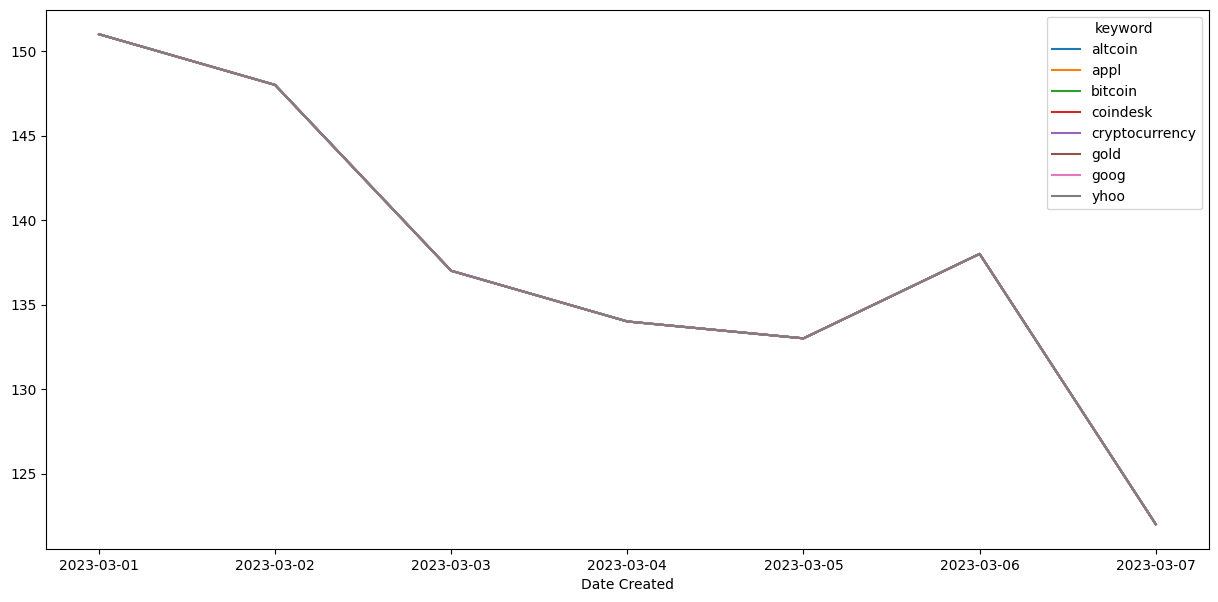

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dup_df.groupby(['Date Created','keyword'])['Date Created', 'keyword', 'Count'].count()['Count'].unstack().plot(ax=ax)


In [38]:
test_df = pd.DataFrame(dup_df.groupby(['Date Created','keyword'])['Date Created', 'keyword', 'Count'].count()['Count'])
test_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_15836\875113924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_df = pd.DataFrame(dup_df.groupby(['Date Created','keyword'])['Date Created', 'keyword', 'Count'].count()['Count'])


Count
Date Created keyword              
2023-03-01   altcoin           151
             appl              151
             bitcoin           151
             coindesk          151
             cryptocurrency    151
             gold              151
             goog              151
             yhoo              151
2023-03-02   altcoin           148
             appl              148
             bitcoin           148
             coindesk          148
             cryptocurrency    148
             gold              148
             goog              148
             yhoo              148
2023-03-03   altcoin           137
             appl              137
             bitcoin           137
             coindesk          137
             cryptocurrency    137
             gold              137
             goog              137
             yhoo              137
2023-03-04   altcoin           134
             appl              134
             bitcoin           134
             coindesk          134
             cryptocurrency    134
             gold              134
             goog              134
             yhoo              134
2023-03-05   altcoin           133
             appl              133
             bitcoin           133
             coindesk          133
             cryptocurrency    133
             gold              133
             goog              133
             yhoo              133
2023-03-06   altcoin           138
             appl              138
             bitcoin           138
             coindesk          138
             cryptocurrency    138
             gold              138
             goog              138
             yhoo              138
2023-03-07   altcoin           122
             appl              122
             bitcoin           122
             coindesk          122
             cryptocurrency    122
             gold              122
             goog              122
             yhoo              122

In [47]:
test_df.reset_index(inplace=True)

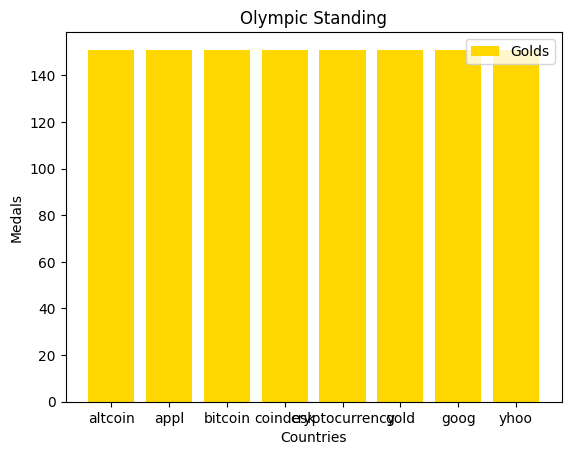

In [51]:
plt.bar(test_df['keyword'],
       test_df['Count'],
       color='gold',
       label='Golds')
# plt.bar(countries,
#        silvers,
#        color='silver',
#        label='Silvers',
#        bottom = golds)
# plt.bar(countries,
#        bronzes,
#        color='#C88040',
#        label='Bronzes',
#        bottom = golds + silvers)
plt.title ('Olympic Standing')
plt.xlabel('Countries')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [65]:
test_df = pd.DataFrame(dup_df.groupby(['Date Created','keyword']).count())
test_df.drop(columns=['User','Tweet'], inplace=True)

In [67]:
test_df

Count
Date Created keyword              
2023-03-01   altcoin           151
             appl              151
             bitcoin           151
             coindesk          151
             cryptocurrency    151
             gold              151
             goog              151
             yhoo              151
2023-03-02   altcoin           148
             appl              148
             bitcoin           148
             coindesk          148
             cryptocurrency    148
             gold              148
             goog              148
             yhoo              148
2023-03-03   altcoin           137
             appl              137
             bitcoin           137
             coindesk          137
             cryptocurrency    137
             gold              137
             goog              137
             yhoo              137
2023-03-04   altcoin           134
             appl              134
             bitcoin           134
             coindesk          134
             cryptocurrency    134
             gold              134
             goog              134
             yhoo              134
2023-03-05   altcoin           133
             appl              133
             bitcoin           133
             coindesk          133
             cryptocurrency    133
             gold              133
             goog              133
             yhoo              133
2023-03-06   altcoin           138
             appl              138
             bitcoin           138
             coindesk          138
             cryptocurrency    138
             gold              138
             goog              138
             yhoo              138
2023-03-07   altcoin           122
             appl              122
             bitcoin           122
             coindesk          122
             cryptocurrency    122
             gold              122
             goog              122
             yhoo              122

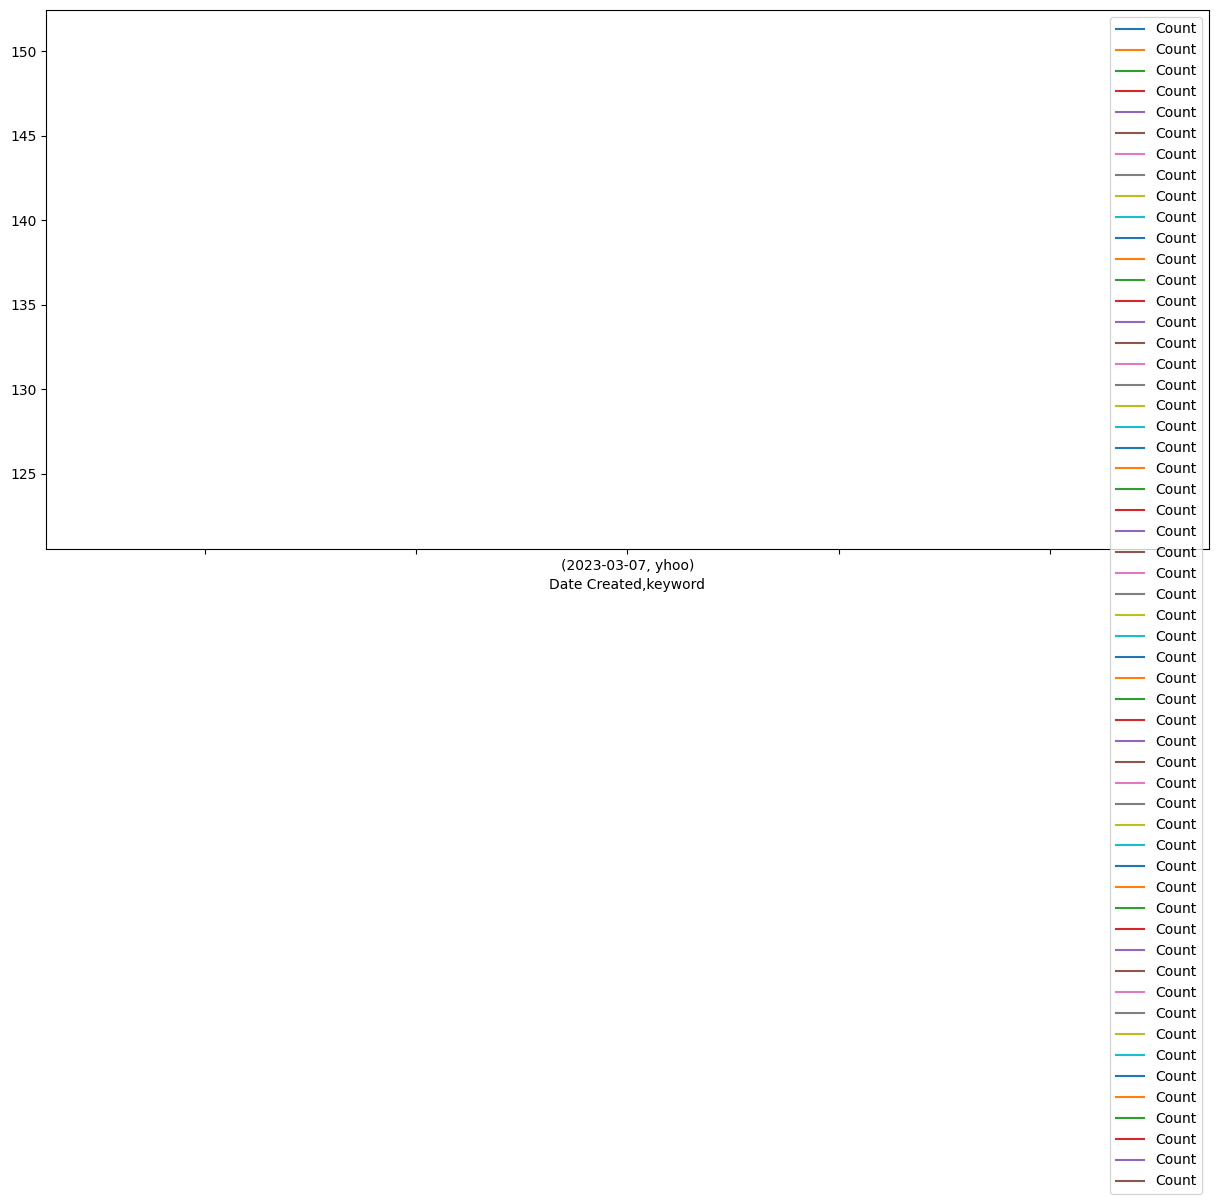

In [72]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
test_df.groupby(['Date Created','keyword']).plot(ax=ax)
plt.show()

In [ ]:
plt.bar(,
       golds,
       color='gold',
       label='Golds')
plt.bar(countries,
       silvers,
       color='silver',
       label='Silvers',
       bottom = golds)
plt.bar(countries,
       bronzes,
       color='#C88040',
       label='Bronzes',
       bottom = golds + silvers)
plt.title ('Olympic Standing')
plt.xlabel('Countries')
plt.ylabel('Medals')
plt.legend()
plt.show()